<a href="https://colab.research.google.com/github/Deba951/Hyperspectral_Image_Analysis_Learning/blob/main/RandomForestInddianPinesDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving Indian_pines_corrected.mat to Indian_pines_corrected.mat


In [2]:
from google.colab import files
uploaded=files.upload()

Saving Indian_pines_gt.mat to Indian_pines_gt.mat


In [3]:
from scipy.io import loadmat
## Read the data.
dataset = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
ground_truth = loadmat('Indian_pines_gt.mat')['indian_pines_gt']

In [4]:
from tqdm import tqdm
import pandas as pd
def extract_pixels(dataset, ground_truth):
    df = pd.DataFrame()
    for i in tqdm(range(dataset.shape[2])):
        df = pd.concat([df, pd.DataFrame(dataset[:, :, i].ravel())], axis=1)
    df = pd.concat([df, pd.DataFrame(ground_truth.ravel())], axis=1)
    df.columns = [f'band-{i}' for i in range(1, 1+dataset.shape[2])]+['class']
    return df

In [5]:
df = extract_pixels(dataset, ground_truth)

100%|██████████| 200/200 [00:00<00:00, 542.57it/s]


In [6]:
#Saving the data to a csv file.
df.to_csv('Dataset.csv', index=False)

In [14]:
import pandas as pd

# Assuming the uploaded file is named "data.csv"
# file_path = '/content/drive/MyDrive/IndianPines.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/Dataset.csv')

# Now you can use 'df' to work with the data in your Colab notebook


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

In [16]:
print(f'Shape of the data: {df.shape}')

Shape of the data: (21025, 201)


In [17]:
print(f"Unique Class Labels: {df.loc[:, 'class'].unique()}")

Unique Class Labels: [ 3  0 15 11 12  5 10 14 16  2  4  8  6  9  1  7 13]


In [18]:
df['class'].value_counts()

0     10776
11     2455
2      1428
14     1265
10      972
3       830
6       730
12      593
5       483
8       478
15      386
4       237
13      205
16       93
1        46
7        28
9        20
Name: class, dtype: int64

In [19]:
df.head()

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [20]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x.shape, y.shape

((21025, 200), (21025,))

In [21]:
from sklearn.model_selection import train_test_split

if len(x) < 4 or len(y) < 4:
    print("Insufficient data points to split into training and test sets.")
else:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
    indices_train = range(len(x_train))
    indices_test = range(len(x_train), len(x_train) + len(x_test))
    print("x_train shape:", x_train.shape)
    print("x_test shape:", x_test.shape)


x_train shape: (16820, 200)
x_test shape: (4205, 200)


In [22]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

**FITTING RANDOM FOREST ALGORITHM TO THE TRAINING SET**

In [23]:
#Fitting Decision Tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [24]:
y_train_pred=classifier.predict(x_train)

In [25]:
#Predicting the test set result
y_pred= classifier.predict(x_test)

In [26]:
print(y_pred)

[ 0  0 11 ...  0  0  0]


In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)}%')

Accuracy: 0.7869203329369798%


In [28]:
print(f'Accuracy: {accuracy_score(y_train, y_train_pred)}%')

Accuracy: 0.9901307966706302%


In [29]:
!pip install -q scikit-plot

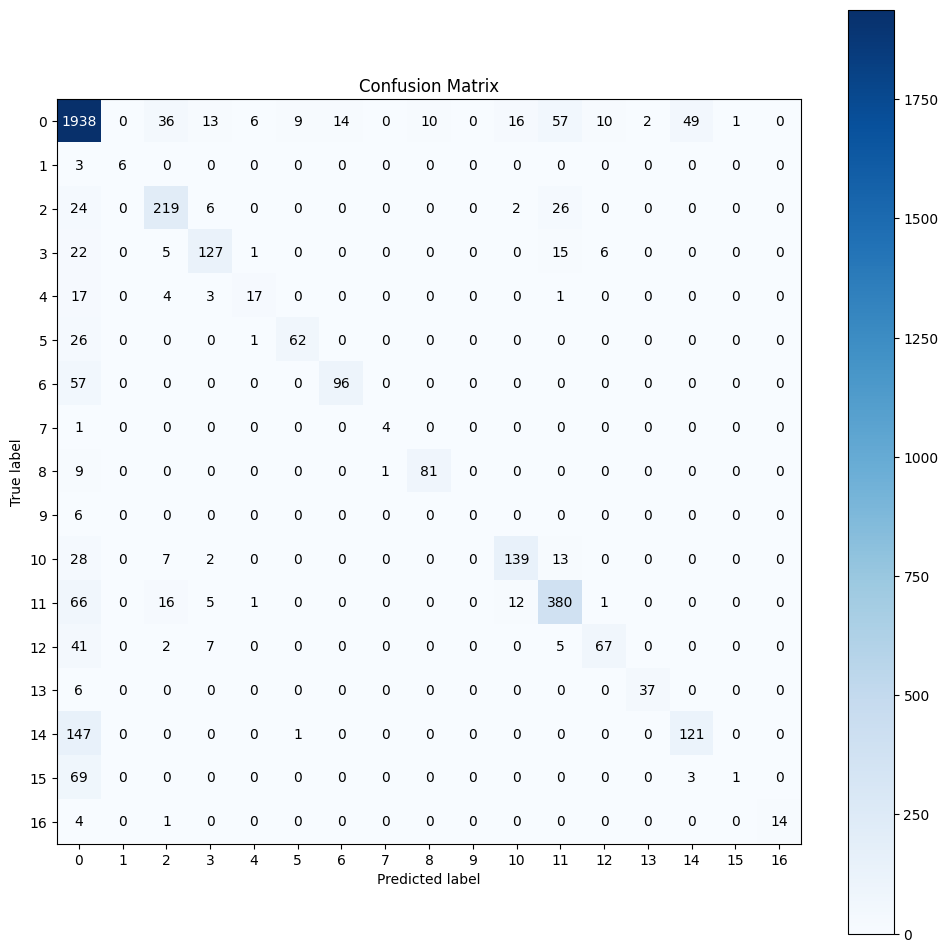

In [30]:
#Creating the Confusion matrix
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred,
    figsize=(12,12));

In [31]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z= confusion_matrix(y_test, y_pred),
                   x=[f'class-{i}' for i in np.unique(df.loc[:, 'class'].values)],
                   y=[f'class-{i}' for i in np.unique(df.loc[:, 'class'].values)],
                   hoverongaps = False))
fig.show()

In [32]:
# print(confusion_matrix(y_test,y_pred))
print('Classification report:\n',classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84      2161
           1       1.00      0.67      0.80         9
           2       0.76      0.79      0.77       277
           3       0.78      0.72      0.75       176
           4       0.65      0.40      0.50        42
           5       0.86      0.70      0.77        89
           6       0.87      0.63      0.73       153
           7       0.80      0.80      0.80         5
           8       0.89      0.89      0.89        91
           9       0.00      0.00      0.00         6
          10       0.82      0.74      0.78       189
          11       0.76      0.79      0.78       481
          12       0.80      0.55      0.65       122
          13       0.95      0.86      0.90        43
          14       0.70      0.45      0.55       269
          15       0.50      0.01      0.03        73
          16       1.00      0.74      0.85        19

  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**CLASSIFIACTION MAP**

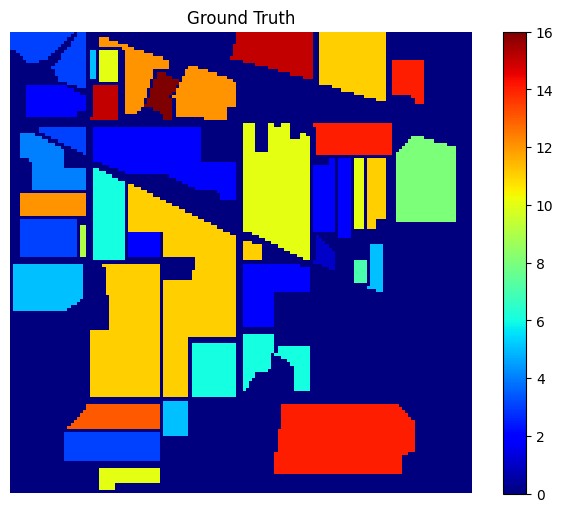

In [33]:
plt.figure(figsize=(8, 6))
plt.imshow(df.iloc[:, -1].values.reshape((145, 145)), cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Ground Truth')
plt.savefig('ground_truth.png')
plt.show()

**Generating predictions for the entire feature space**

In [34]:
# !pip install tqdm
from tqdm import tqdm
pre = y_pred

clmap = [0]*x.shape[0]

for i in tqdm(range(len(indices_train))):
    clmap[indices_train[i]] = y[indices_train[i]]

for i in tqdm(range(len(indices_test))):
    clmap[indices_test[i]] = pre[i]

100%|██████████| 4205/4205 [00:00<00:00, 195242.64it/s]


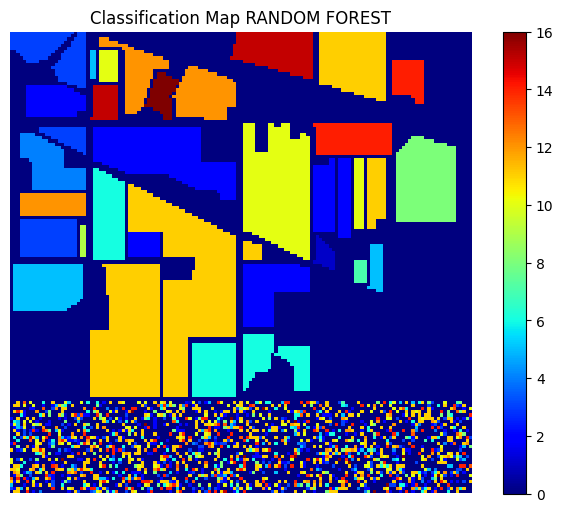

In [35]:
plt.figure(figsize=(8, 6))
plt.imshow(np.array(clmap).reshape((145, 145)), cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Classification Map RANDOM FOREST')
plt.savefig('Classification_map.png')
plt.show()

# **CROSS VALIDATION**




In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score


# Separate features and labels
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Number of folds for cross-validation
n_folds = 5

# Initialize the cross-validation splitter
k_fold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Lists to store accuracy scores of each fold
accuracy_scores = []

# Perform cross-validation
for fold_idx, (train_index, test_index) in enumerate(k_fold.split(x, y)):
    print(f"Fold {fold_idx + 1}/{n_folds}")

    # Get the training and testing data for this fold
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = classifier.predict(X_test)

    # Calculate and print accuracy for this fold
    fold_accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(fold_accuracy)
    print(f"Accuracy: {fold_accuracy:.4f}\n")

# Calculate the mean and standard deviation of accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print("Cross-validation results:")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation: {std_accuracy:.4f}")


Fold 1/5
Accuracy: 0.7872

Fold 2/5
Accuracy: 0.7874

Fold 3/5
Accuracy: 0.7874

Fold 4/5
Accuracy: 0.7848

Fold 5/5
Accuracy: 0.7838

Cross-validation results:
Mean Accuracy: 0.7861
Standard Deviation: 0.0015


# Performance Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification report:
               precision    recall  f1-score   support

           0       0.51      1.00      0.68      2155
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00       286
           3       0.00      0.00      0.00       166
           4       0.00      0.00      0.00        47
           5       0.00      0.00      0.00        96
           6       0.00      0.00      0.00       146
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00        96
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00       195
          11       0.00      0.00      0.00       491
          12       0.00      0.00      0.00       119
          13       0.00      0.00      0.00        41
          14       0.00      0.00      0.00       253
          15       0.00      0.00      0.00        77
          16       0.00      0.00      0.00        18

  

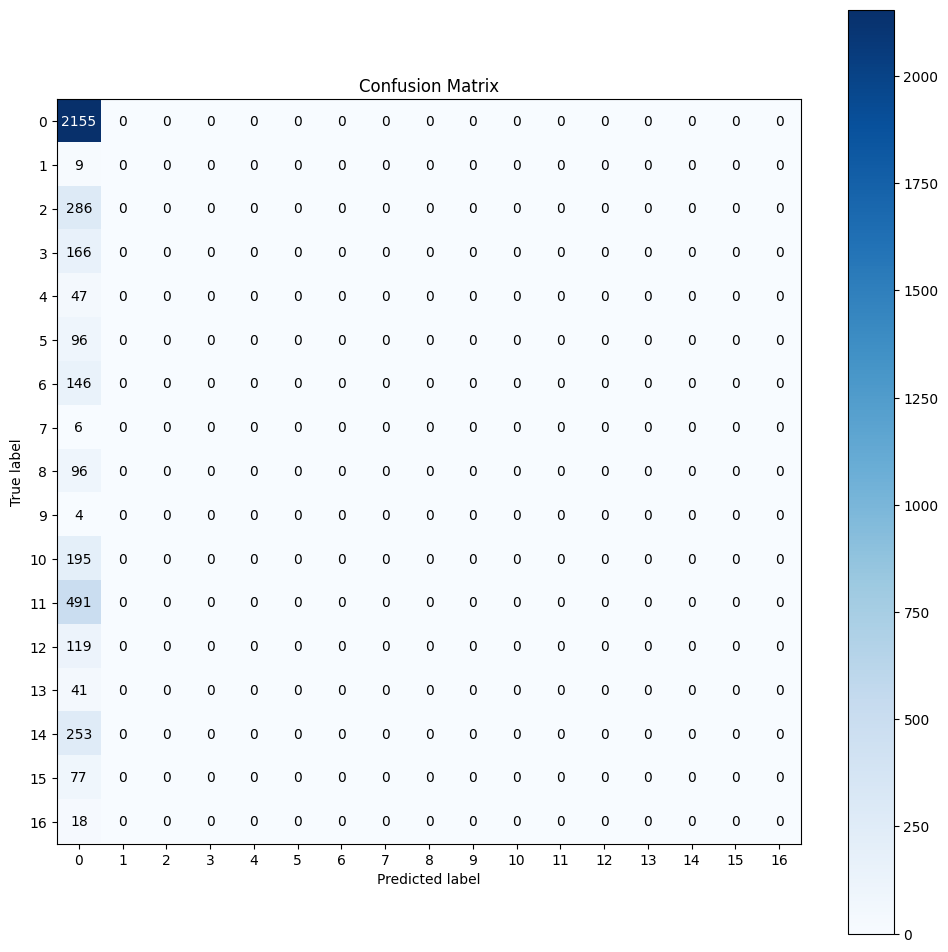

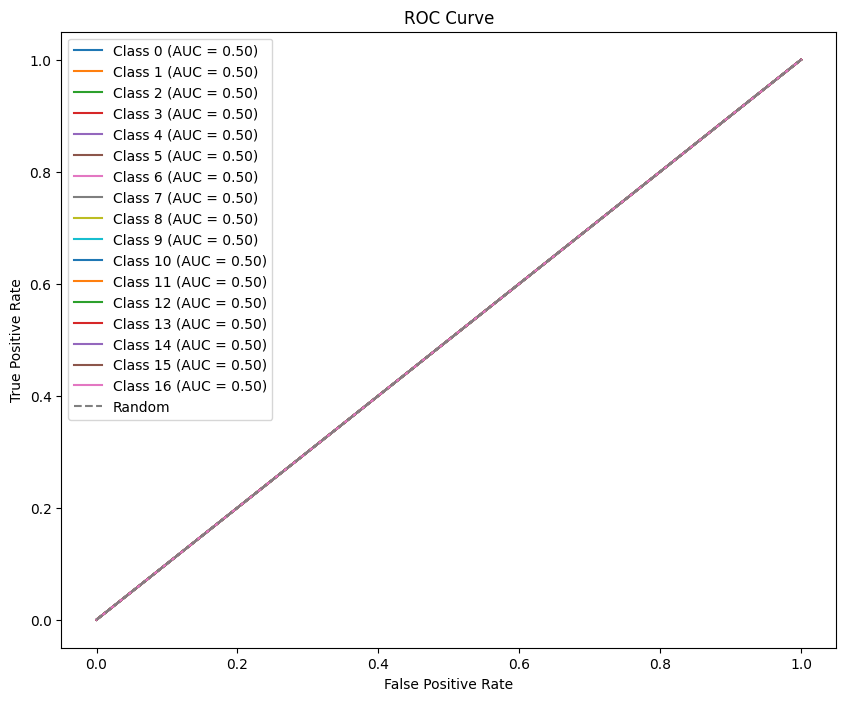

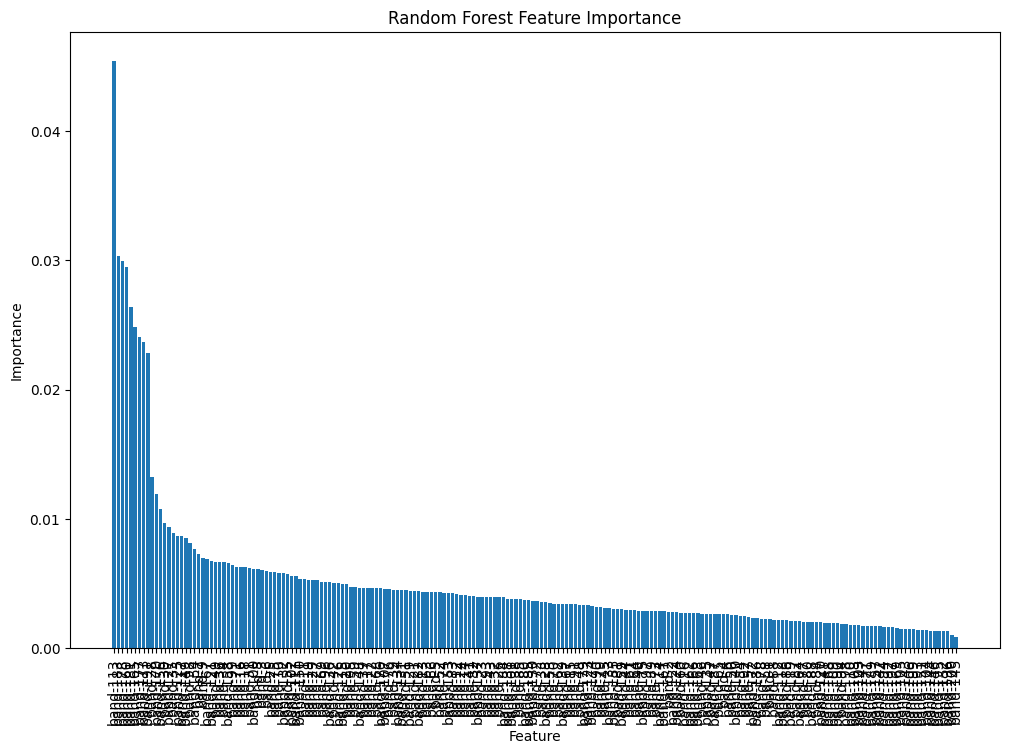

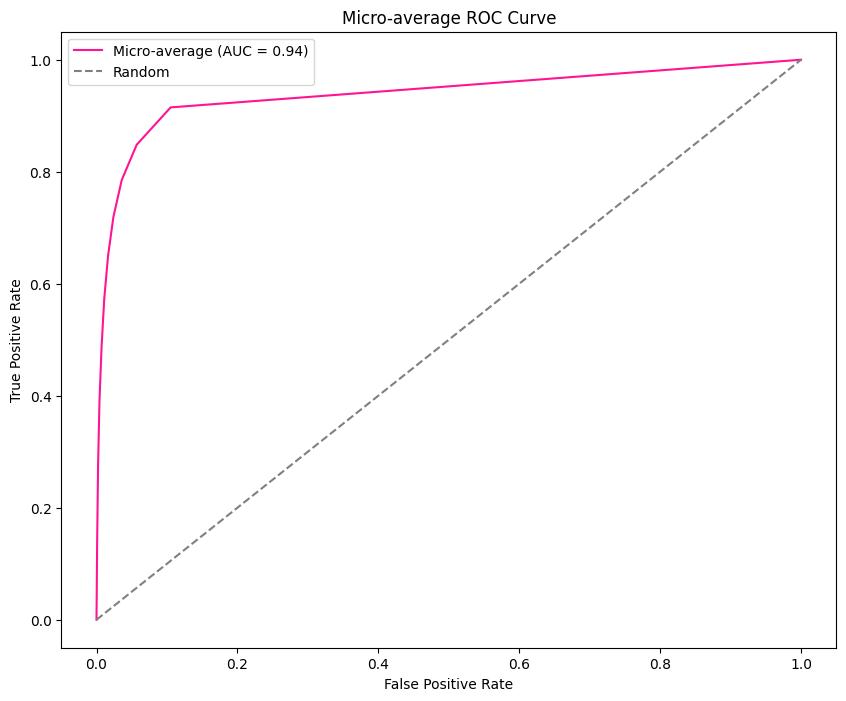

In [42]:
# Importing additional libraries
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

# Function to perform performance analysis
def performance_analysis(model, x_test, y_test):
    # Predictions on the test set
    y_pred = model.predict(x_test)

    # Classification report
    print('Classification report:\n', classification_report(y_test, y_pred))

    # Confusion Matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(12, 12))
    plt.show()

    # ROC Curve and AUC
    if len(np.unique(y_test)) > 2:
        y_bin = label_binarize(y_test, classes=np.unique(y_test))
        y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test))

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(np.unique(y_test))):
            fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_bin[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plotting the ROC curve
        plt.figure(figsize=(10, 8))
        for i in range(len(np.unique(y_test))):
            plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()

    # Precision-Recall Curve
    # precision, recall, _ = precision_recall_curve(y_test, y_pred)

    # Plotting the Precision-Recall curve
    # plt.figure(figsize=(10, 8))
    # plt.plot(recall, precision, color='darkorange', lw=2)
    # plt.xlabel('Recall')
    # plt.ylabel('Precision')
    # plt.title('Precision-Recall Curve')
    # plt.show()

    # Feature Importance for Random Forest
    if isinstance(model, RandomForestClassifier):
        feature_importance = model.feature_importances_
        feature_names = df.columns[:-1]

        # Sorting features based on importance
        sorted_idx = np.argsort(feature_importance)[::-1]

        # Plotting the feature importance
        plt.figure(figsize=(12, 8))
        plt.bar(range(len(feature_importance)), feature_importance[sorted_idx])
        plt.xticks(range(len(feature_importance)), feature_names[sorted_idx], rotation=90)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.title('Random Forest Feature Importance')
        plt.show()

# Perform performance analysis on the Random Forest model
performance_analysis(classifier, x_test, y_test)

# Cross-validated predictions for ROC curve and Precision-Recall curve
y_scores = cross_val_predict(classifier, x, y, method='predict_proba', cv=n_folds)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(label_binarize(y, classes=np.unique(y))[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr['micro'], tpr['micro'], _ = roc_curve(label_binarize(y, classes=np.unique(y)).ravel(), y_scores.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

# Plotting the micro-average ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr['micro'], tpr['micro'], label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})', color='deeppink')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve')
plt.legend()
plt.show()
